In [74]:
import sys
import os
import importlib

# Ajout du chemin une fois
sys.path.append(os.path.abspath('../../python_files'))

# Liste des noms des modules à importer et recharger
module_names = [
    'preprocessing',
    'imports',
    'files',
    'clustering',
    'profile_prediction',
    'prediction_24h'
]

# Import et reload automatique
modules = {}
for name in module_names:
    modules[name] = importlib.import_module(name)
    importlib.reload(modules[name])

# Importer tout en global namespace (équivalent à from ... import *)
for name in module_names:
    exec(f'from {name} import *')


In [67]:
Simulation_Dataset = {
    "2018": "../../data/simulated_data_7years/Mal_isole/2018/Simulation_Outputs",
    "2019": "../../data/simulated_data_7years/Mal_isole/2019/Simulation_Outputs",
    "2020": "../../data/simulated_data_7years/Mal_isole/2020/Simulation_Outputs",
    "2021": "../../data/simulated_data_7years/Mal_isole/2021/Simulation_Outputs",
    "2022": "../../data/simulated_data_7years/Mal_isole/2022/Simulation_Outputs",
    "2023": "../../data/simulated_data_7years/Mal_isole/2023/Simulation_Outputs",
    "2024": "../../data/simulated_data_7years/Mal_isole/2024/Simulation_Outputs"   
}

Weather_Dataset = {
    "2018": "../../data/simulated_data_7years/Mal_isole/2018/Weather_Dataset.txt",
    "2019": "../../data/simulated_data_7years/Mal_isole/2019/Weather_Dataset.txt",
    "2020": "../../data/simulated_data_7years/Mal_isole/2020/Weather_Dataset.txt",
    "2021": "../../data/simulated_data_7years/Mal_isole/2021/Weather_Dataset.txt",
    "2022": "../../data/simulated_data_7years/Mal_isole/2022/Weather_Dataset.txt",
    "2023": "../../data/simulated_data_7years/Mal_isole/2023/Weather_Dataset.txt",
    "2024": "../../data/simulated_data_7years/Mal_isole/2024/Weather_Dataset.txt"   
}


In [68]:

# Exemple d'utilisation
city_groups = {
    "Weather_Dataset": Weather_Dataset
   
    
}

prefix_column_map = {
    "Text_": 1,
    "Hum_": 3,
    "Wind_": 4,
    "Solar_": 5,
    "Ground_": 10
}

combined_data = extract_and_combine_all(city_groups, prefix_column_map)

city_groups = {
    "Simulation_Dataset":Simulation_Dataset  
}

prefix_column_map = {
    "Tint_": 2,   
}

combined_Tint = extract_and_combine_all(city_groups, prefix_column_map)


In [69]:
Text_combined = combined_data.get('Text_combined_Weather_Dataset')
Hum_combined = combined_data.get('Hum_combined_Weather_Dataset')
Tint_combined = combined_Tint.get('Tint_combined_Simulation_Dataset')
consommation_chauffage = extract_and_concat_consommation(Simulation_Dataset, column_index=4, prefix="consommation_heat_")


In [70]:
start_date = "2018-01-01"
dates = pd.date_range(start=start_date, periods=len(consommation_chauffage), freq="D") 
consommation_chauffage.insert(0, "Date", dates)
Text_combined.insert(0, "Date", dates)
Hum_combined.insert(0, "Date", dates)
Tint_combined.insert(0, "Date", dates)

In [71]:

add_heating_season(consommation_chauffage)
add_heating_season(Text_combined)
add_heating_season(Hum_combined)
add_heating_season(Tint_combined)

,Date,0,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,heat
0,2018-01-01,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.0,...,20.533875,20.305399,20.037956,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,1
1,2018-01-02,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.0,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,1
2,2018-01-03,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.0,...,20.242283,20.282714,20.719772,20.710503,20.447397,20.403769,20.213665,20.161735,20.054447,1
3,2018-01-04,20.052706,20.026516,20.026516,20.00000,20.000000,20.000000,20.000000,20.000000,20.0,...,22.529172,22.492439,22.947582,22.803923,22.457802,22.347678,22.174044,22.076780,21.888060,1
4,2018-01-05,21.784383,21.647178,21.515601,21.35046,21.161888,20.985896,20.839354,20.375304,20.0,...,21.374110,21.090203,22.341661,22.497844,22.053192,22.087549,21.799192,21.752752,21.539097,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2550,2024-12-25,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.0,...,20.000000,20.000000,21.398746,21.402382,20.743389,20.739754,20.232003,20.232003,20.000000,1
2551,2024-12-26,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.0,...,20.000000,20.538002,22.430791,22.297324,21.526660,21.430841,20.932792,20.771600,20.370160,1
2552,2024-12-27,20.222637,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.0,...,22.867258,23.038786,22.777539,22.133472,21.618445,21.270036,20.975117,20.672970,20.382512,1
2553,2024-12-28,20.130276,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.0,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,1


# Histogramme des distributions des valeurs moyennes journalières

Cet histogramme présente la distribution des valeurs moyennes quotidiennes calculées sur chaque jour, réparties sur 7 années.  
Pour chaque année, les jours sont classés en 4 plages de valeurs définies globalement sur l'ensemble des données, avec un dernier segment dynamique qui s'adapte à la valeur maximale de chaque année.  
La hauteur des barres indique le pourcentage de jours appartenant à chaque plage, permettant ainsi de comparer facilement la répartition des valeurs moyennes journalières d'année en année.


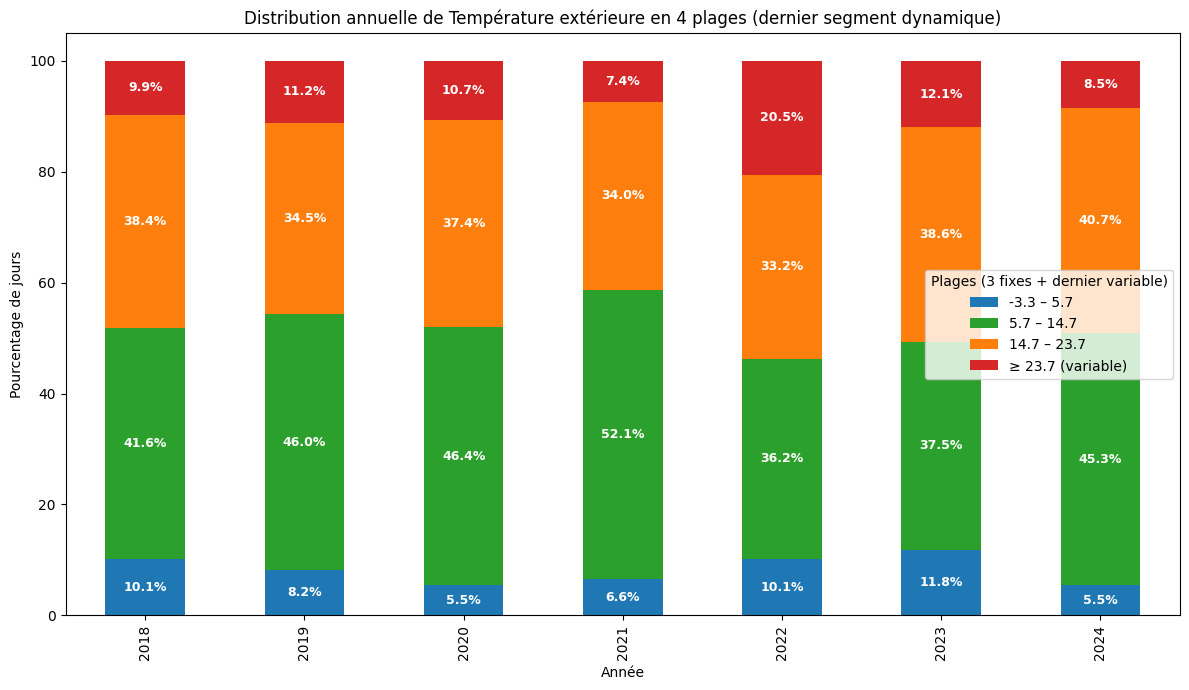

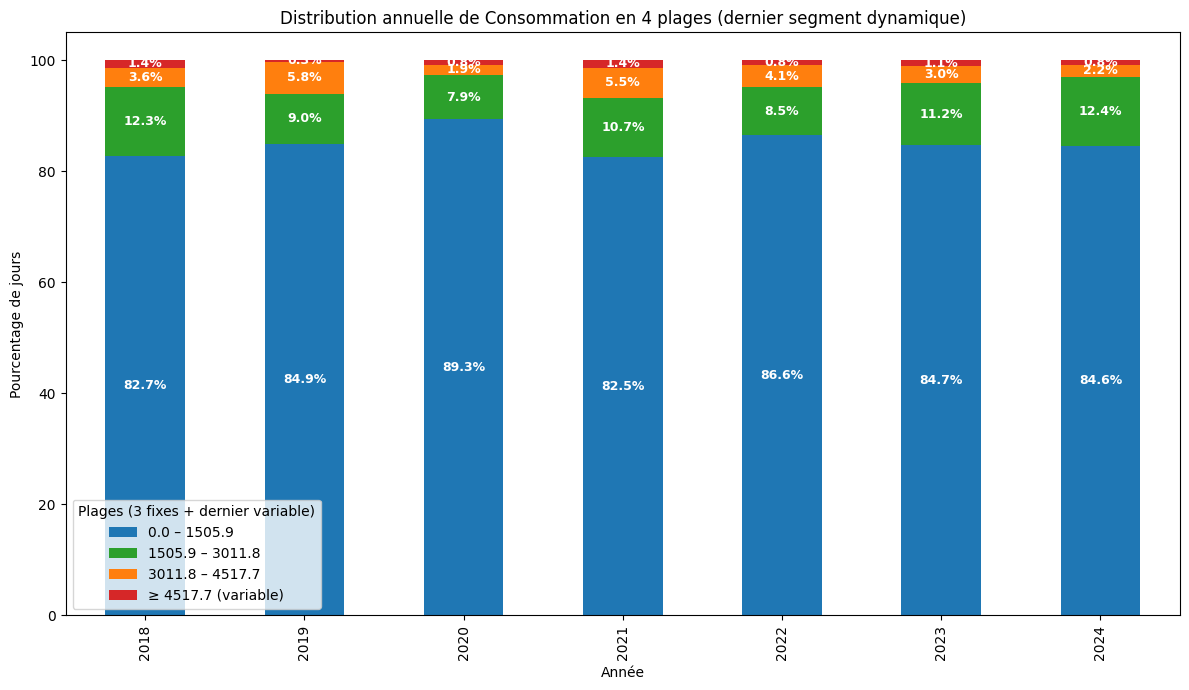

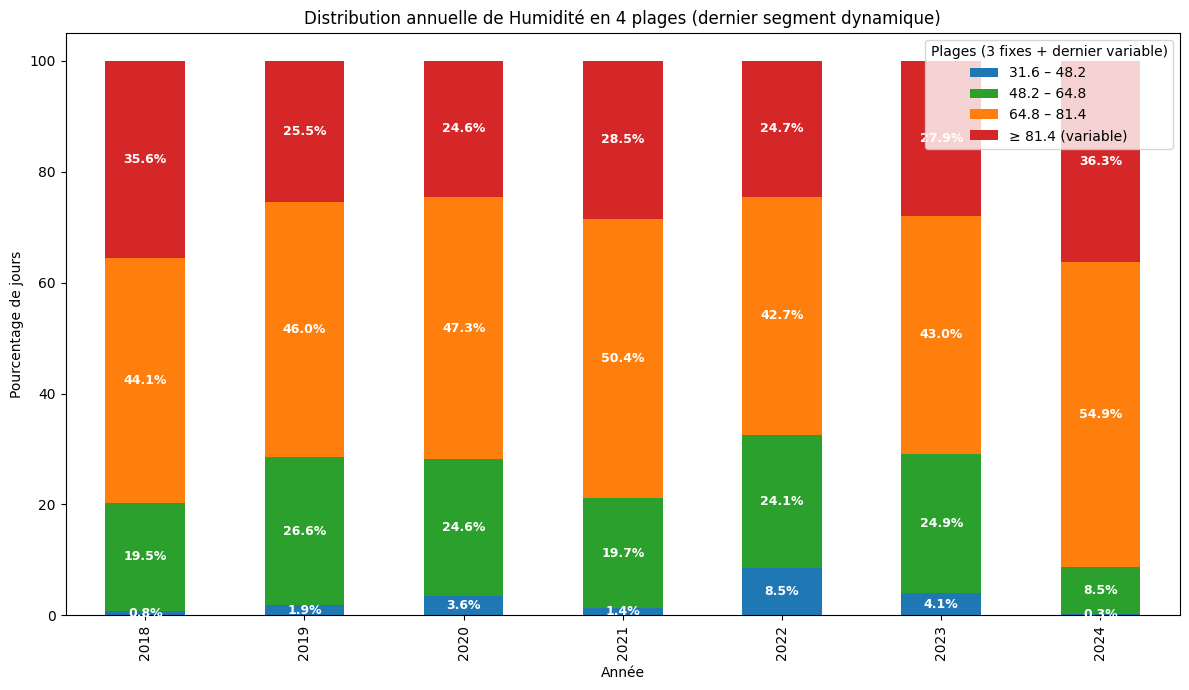

In [81]:
histogramme_moyenne(Text_combined.drop(columns=['heat']), variable_name="Température extérieure")
histogramme_moyenne(consommation_chauffage.drop(columns=['heat']), variable_name="Consommation")
histogramme_moyenne(Hum_combined.drop(columns=['heat']), variable_name="Humidité")

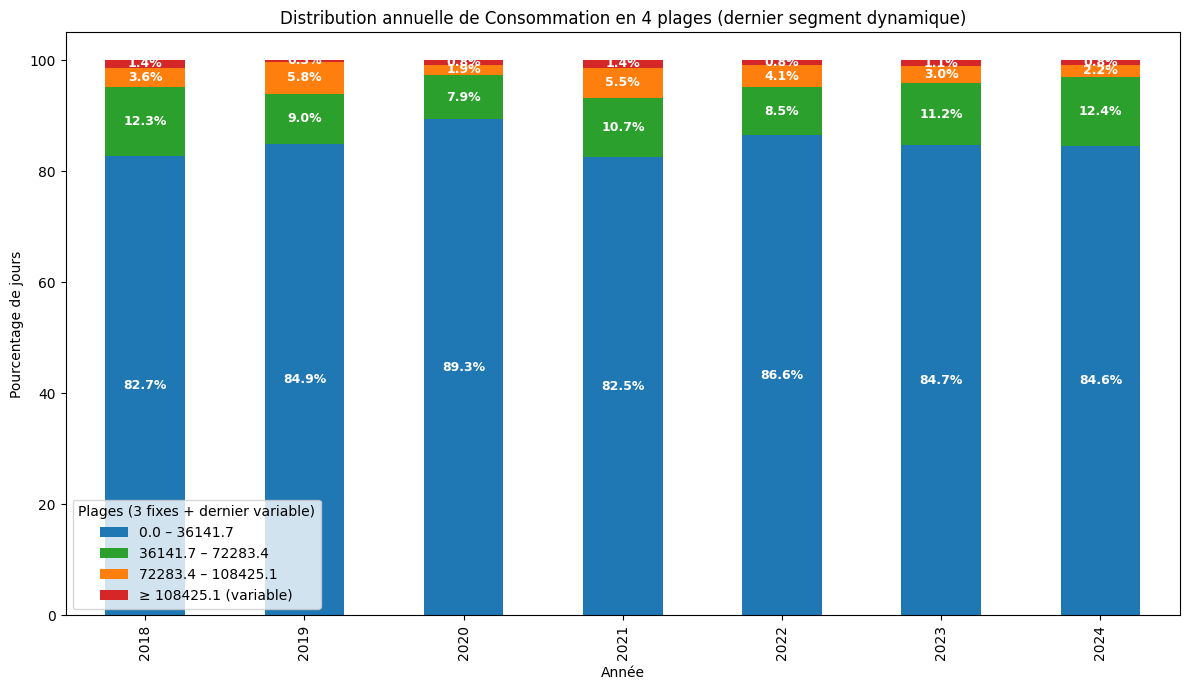

,0.0 – 36141.7,36141.7 – 72283.4,72283.4 – 108425.1,≥ 108425.1 (variable)
2018,82.739726,12.328767,3.561644,1.369863
2019,84.931507,9.041096,5.753425,0.273973
2020,89.344262,7.923497,1.912568,0.819672
2021,82.465753,10.684932,5.479452,1.369863
2022,86.575342,8.493151,4.109589,0.821918
2023,84.657534,11.232877,3.013699,1.095890
2024,84.615385,12.362637,2.197802,0.824176


In [75]:
histogramme_somme_journaliere(consommation_chauffage.drop(columns=['heat']), variable_name="Consommation")


In [77]:
df_conso = consommation_chauffage[consommation_chauffage["heat"] == 1].copy()
df_Text = Text_combined[Text_combined["heat"] == 1].copy()
df_Hum = Hum_combined[Hum_combined["heat"] == 1].copy()
df_Tint = Tint_combined[Hum_combined["heat"] == 1].copy()



# Histogramme des distributions des sommes journalières (période novembre - avril)

Cet histogramme montre la répartition des sommes quotidiennes calculées pour chaque jour compris entre le **1er novembre** et le **31 avril** sur une période de 7 années.  
Pour chaque année, les jours de cette période sont classés en 4 plages de valeurs définies globalement sur l'ensemble des données, avec un dernier segment dynamique adapté à la valeur maximale de chaque année.  
La hauteur des barres représente le pourcentage de jours dans chaque plage, permettant de comparer la distribution des sommes journalières durant la période froide d'année en année.


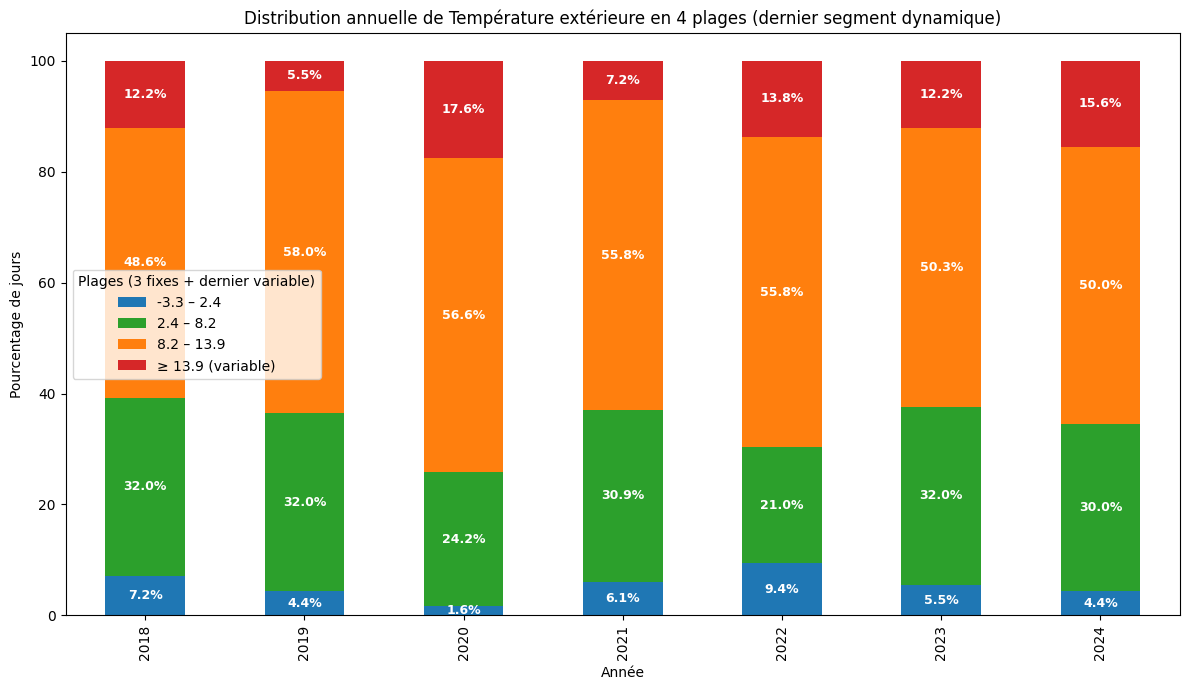

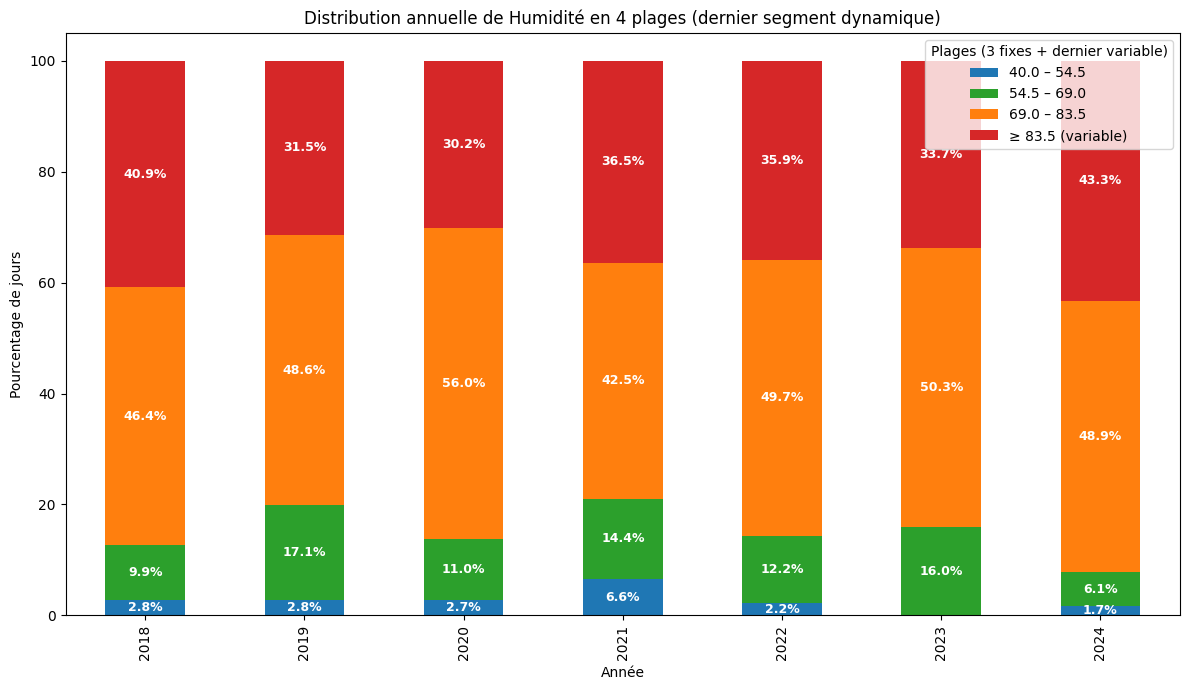

In [79]:
histogramme_moyenne(df_Text.drop(columns=['heat']), variable_name="Température extérieure")
histogramme_moyenne(df_Hum.drop(columns=['heat']), variable_name="Humidité")

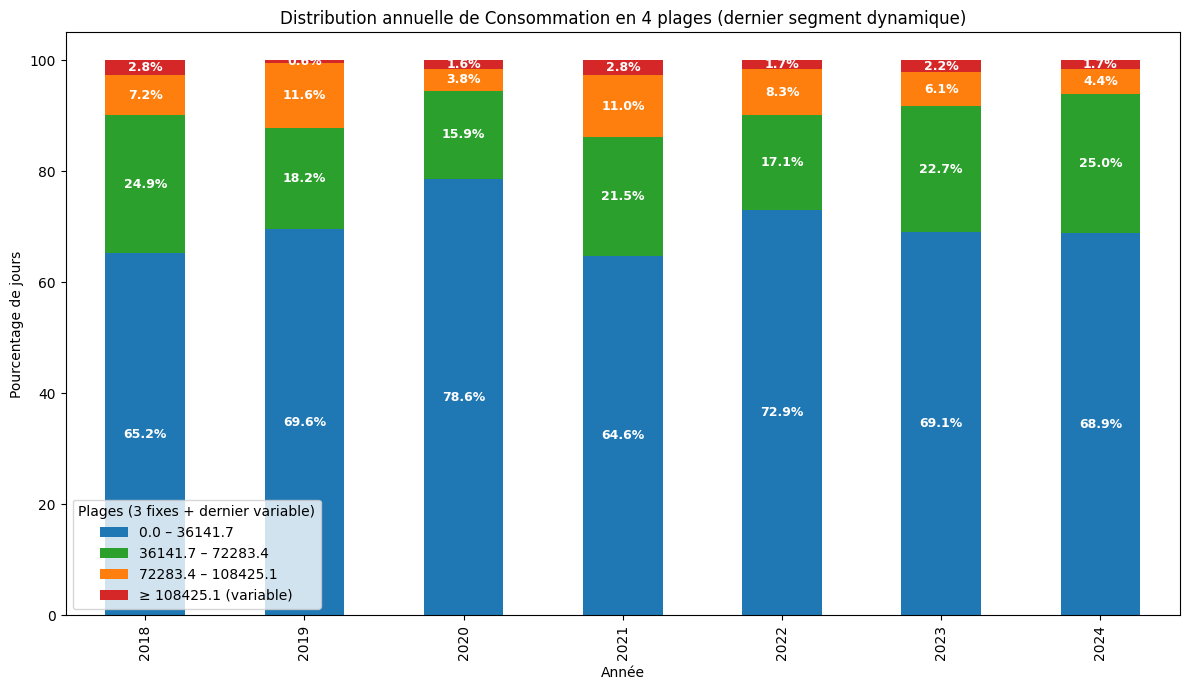

,0.0 – 36141.7,36141.7 – 72283.4,72283.4 – 108425.1,≥ 108425.1 (variable)
2018,65.193370,24.861878,7.182320,2.762431
2019,69.613260,18.232044,11.602210,0.552486
2020,78.571429,15.934066,3.846154,1.648352
2021,64.640884,21.546961,11.049724,2.762431
2022,72.928177,17.127072,8.287293,1.657459
2023,69.060773,22.651934,6.077348,2.209945
2024,68.888889,25.000000,4.444444,1.666667


In [80]:
histogramme_somme_journaliere(df_conso.drop(columns=['heat']), variable_name="Consommation")
